In [245]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
# load data
%run ./Preprocessing.ipynb
df = get_data()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
name               10841 non-null object
category           10841 non-null object
rating             9367 non-null float64
reviews            10841 non-null object
size               10841 non-null object
installs           10841 non-null object
type               10840 non-null object
price              10841 non-null object
content_rating     10840 non-null object
genres             10841 non-null object
last_updated       10841 non-null object
version            10833 non-null object
android_version    10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
Number of duplicate entries : 1181
Original values : ['Free' 'Paid' nan]
Unique genres before preprocessing : 118
 Apps with more than one genre : 393 
Unique genres : 48
Oldest updated app : 2010
Longest app name with 25 words : 591 housing transactions - renting houses, middle-class houses, new cases, 

In [248]:
orig_df = df.copy()

In [303]:
df = orig_df.copy()

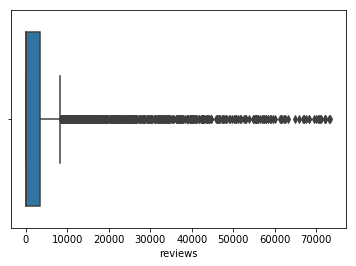

In [252]:
sns.boxplot(df['reviews'])

In [212]:
df.columns

Index(['category', 'rating', 'reviews', 'size', 'installs', 'type', 'price',
       'content_rating', 'genres', 'version', 'android_version',
       'price_rounded', 'last_updated_days', 'last_updated_year',
       'last_updated_month', 'last_updated_day', 'last_updated_month_sin',
       'last_updated_month_cos', 'name_wc'],
      dtype='object')

In [210]:
pre_features = ['category', 'size', 'type', 'price', 'content_rating', 'genres', 'android_version', 'name_wc']
post_features = [feature for feature in df.columns.values if feature not in pre_features]
log_features = ['reviews', 'installs', 'size']
cat_features = ['category', 'type', 'content_rating', 'genres']

In [68]:
df[log_features] = np.log(df[log_features])

/home/bob/programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [214]:
use_categories = False
if not use_categories:
    pre_features = [ft for ft in pre_features if ft not in cat_features]
    post_features = [ft for ft in post_features if ft not in cat_features]
print('Predictors are : %s' % pre_features)

Predictors are : ['size', 'price', 'android_version', 'name_wc']


In [281]:
# removing outliers based on InterQuartileRange first
# zscore should be used only if data is in a normal distribution
# @columns : list of columns to remove outliers from
# when not given, remove outliers from all columns
def remove_outliers(df, columns = None, use_zscore = False):
    # cdf is df restricted to certain columns
    if columns is None:
        cdf = df
    else:
        cdf = df[columns]
    if use_zscore:
        z = np.abs(stats.zscore(cdf))
        mask = (z>3)
    else :
        Q1 = cdf.quantile(0.25)
        Q3 = cdf.quantile(0.75)
        IQR = Q3 - Q1
        mask = (cdf < (Q1 - 1.5 * IQR)) | (cdf > (Q3 + 1.5 * IQR))
    df = df[~mask.any(axis = 1)]
    return df

In [297]:
cdf = df[['installs', 'size']]
Q1 = cdf.quantile(0.25)
Q3 = cdf.quantile(0.75)
IQR = Q3 - Q1
mask = (cdf < (Q1 - 1.5 * IQR)) | (cdf > (Q3 + 1.5 * IQR))
mask.shape

(9658, 2)

In [304]:
remove_outliers(df, columns = ['installs']).shape

(7680, 19)